In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [7]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

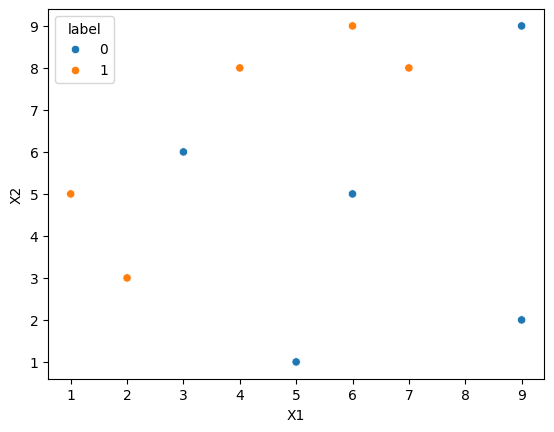

In [9]:
import seaborn as sns

sns.scatterplot(
    x=df['X1'],
    y=df['X2'],
    hue=df['label']
)


In [10]:
df['weights']=1/df.shape[0]

In [11]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt1=DecisionTreeClassifier(max_depth=1)

In [15]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values



In [16]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

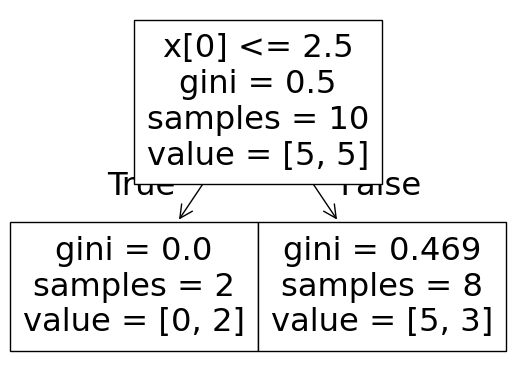

In [17]:

from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

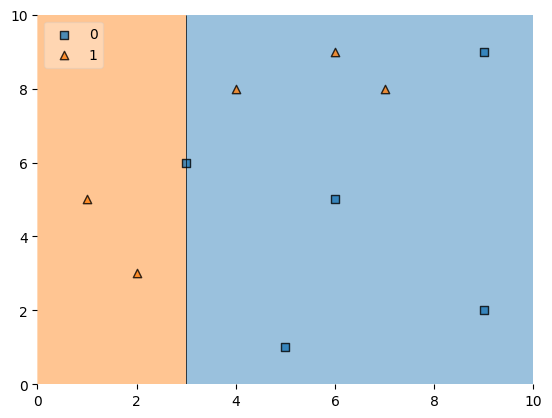

In [19]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [21]:
df['y_pred']=dt1.predict(X)

In [22]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [23]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [24]:
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [25]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-alpha)

    else:
        return row['weights']*np.exp(alpha)
    

In [26]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [27]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [28]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [29]:

df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [30]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [32]:
df['nomalized_weights'].sum()

np.float64(1.0)

In [34]:
df['cumsum_upper']=np.cumsum(df['nomalized_weights'])

In [35]:
df['cumsum_lower']=df['cumsum_upper']-df['nomalized_weights']

In [36]:

df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [37]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [38]:

index_values = create_new_dataset(df)

index_values
     

[5, 5, 0, 0, 3, 7, 5, 8, 3, 1]

In [39]:

second_df = df.iloc[index_values,[0,1,2,3]]
     

In [40]:
second_df

,X1,X2,label,weights
5,6,9,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1


In [41]:

dt2 = DecisionTreeClassifier(max_depth=1)

In [42]:

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [43]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.5, '  False')]

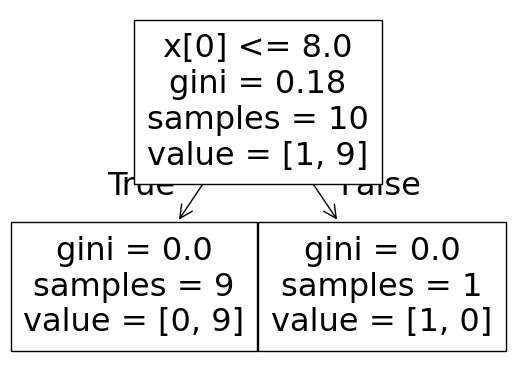

In [44]:

plot_tree(dt2)

<Axes: >

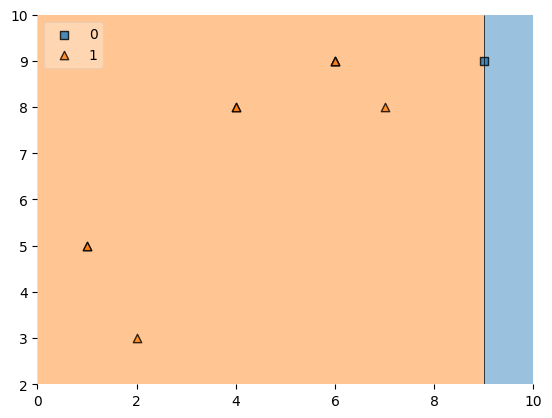

In [45]:

plot_decision_regions(X, y, clf=dt2, legend=2)

In [46]:

second_df['y_pred'] = dt2.predict(X)

In [47]:
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
5,6,9,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
1,2,3,1,0.1,1


In [48]:
alpha2 = calculate_model_weight(0.1)

In [49]:
alpha2

np.float64(1.0986122886681098)

In [50]:

# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [51]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [52]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622


In [53]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()



In [54]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
0,1,5,1,0.1,1,0.033622,0.1
0,1,5,1,0.1,1,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
7,7,8,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
8,9,9,0,0.1,0,0.033622,0.1
3,4,8,1,0.1,1,0.033622,0.1
1,2,3,1,0.1,1,0.033622,0.1


In [55]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [56]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

In [57]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.1,0.0,0.1
5,6,9,1,0.1,1,0.1,0.1,0.2
0,1,5,1,0.1,1,0.1,0.2,0.3
0,1,5,1,0.1,1,0.1,0.3,0.4
3,4,8,1,0.1,1,0.1,0.4,0.5
7,7,8,1,0.1,1,0.1,0.5,0.6
5,6,9,1,0.1,1,0.1,0.6,0.7
8,9,9,0,0.1,0,0.1,0.7,0.8
3,4,8,1,0.1,1,0.1,0.8,0.9
1,2,3,1,0.1,1,0.1,0.9,1.0


In [58]:
index_values = create_new_dataset(second_df)

In [59]:

third_df = second_df.iloc[index_values,[0,1,2,3]]

In [60]:
third_df

,X1,X2,label,weights
5,6,9,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1


In [61]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)
     

DecisionTreeClassifier(max_depth=1)

<Axes: >

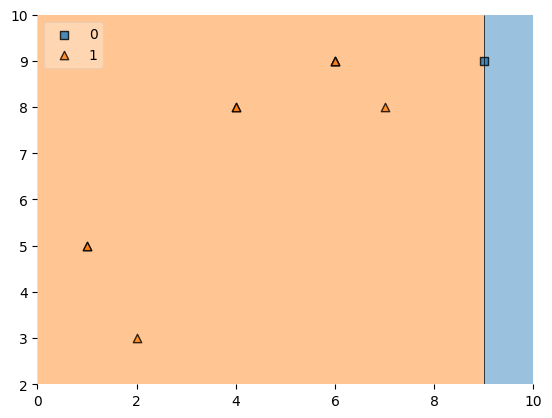

In [62]:

plot_decision_regions(X, y, clf=dt3, legend=2)

In [63]:


third_df['y_pred'] = dt3.predict(X)

In [64]:
alpha3 = calculate_model_weight(0.7)
alpha3
     

np.float64(-0.4236489301936017)

In [65]:

print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [67]:
query = np.array([1, 5]).reshape(1, 2)


In [68]:
dt1.predict(query)

array([1])

In [69]:
dt2.predict(query)

array([1])

In [70]:
dt3.predict(query)

array([1])

In [71]:
alpha1*1+alpha2*(1)+alpha3*(1)

np.float64(1.09861228866811)

In [72]:
np.sign(1.09)

np.float64(1.0)

In [73]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)
     

array([0])

In [74]:
dt2.predict(query)

array([0])

In [75]:
dt3.predict(query)

array([0])

In [76]:

alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [77]:

np.sign(-0.25)

np.float64(-1.0)